In [ ]:
!pip install diffusers

ERROR: Operation cancelled by user


In [ ]:
from diffusers import DiffusionPipeline

In [ ]:
model_id = "CompVis/ldm-celebahq-256"

# load model and scheduler
pipeline = DiffusionPipeline.from_pretrained(model_id)

unet/diffusion_pytorch_model.safetensors not found
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.


Loading pipeline components...:   0%|          | 0/3 [00:00<?, ?it/s]

The config attributes {'timestep_values': None, 'timesteps': 1000} were passed to DDIMScheduler, but are not expected and will be ignored. Please verify your scheduler_config.json configuration file.


In [ ]:
# run pipeline in inference (sample random noise and denoise)
image = pipeline(num_inference_steps=50)

  0%|          | 0/50 [00:00<?, ?it/s]

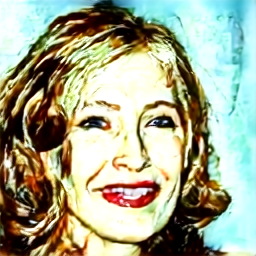

In [ ]:
image[0][0]

In [ ]:
# run pipeline in inference (sample random noise and denoise)
image = pipeline(num_inference_steps=200)

  0%|          | 0/200 [00:00<?, ?it/s]

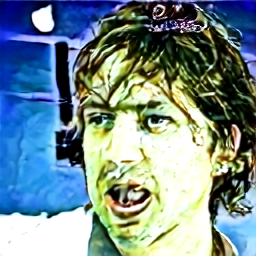

In [ ]:
image[0][0]

In [ ]:
!pip install diffusers
from diffusers import UNet2DModel, DDIMScheduler, VQModel
import torch
import PIL.Image
import numpy as np
import tqdm

seed = 3

# load all models
unet = UNet2DModel.from_pretrained("CompVis/ldm-celebahq-256", subfolder="unet")
vqvae = VQModel.from_pretrained("CompVis/ldm-celebahq-256", subfolder="vqvae")
scheduler = DDIMScheduler.from_config("CompVis/ldm-celebahq-256", subfolder="scheduler")

# set to cuda
torch_device = "cuda" if torch.cuda.is_available() else "cpu"

unet.to(torch_device)
vqvae.to(torch_device)

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)


Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:240: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddim.DDIMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionalit

In [ ]:
unet.sample_size

64

In [ ]:
from IPython.display import display # to display images


In [ ]:
# set inference steps for DDIM
scheduler.set_timesteps(num_inference_steps=1000)

 10%|▉         | 98/1000 [00:06<00:54, 16.59it/s]

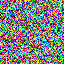

 20%|█▉        | 199/1000 [00:12<00:49, 16.18it/s]

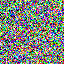

 30%|██▉       | 299/1000 [00:18<00:43, 15.96it/s]

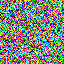

 40%|███▉      | 399/1000 [00:24<00:37, 16.09it/s]

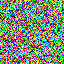

 50%|████▉     | 499/1000 [00:31<00:31, 15.99it/s]

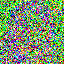

 60%|█████▉    | 599/1000 [00:37<00:25, 15.86it/s]

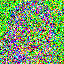

 70%|██████▉   | 699/1000 [00:44<00:19, 15.77it/s]

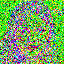

 80%|███████▉  | 799/1000 [00:50<00:12, 15.66it/s]

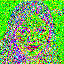

 90%|████████▉ | 899/1000 [00:56<00:06, 15.30it/s]

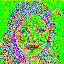

100%|█████████▉| 999/1000 [01:03<00:00, 15.47it/s]

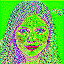

100%|██████████| 1000/1000 [01:03<00:00, 15.76it/s]


In [ ]:
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image
    if t %100 == 0:
      # process image
      image_processed = image.cpu().permute(0, 2, 3, 1)
      image_processed = (image_processed + 1.0) * 127.5
      image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
      image_pil = PIL.Image.fromarray(image_processed[0])
      display(image_pil)





In [ ]:
# decode image with vae
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

with torch.no_grad():
    image = vqvae.decode(image)

# process image
image_processed = image['sample'].cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)

In [ ]:
image['sample']

tensor([[[[0.9713, 0.9773, 0.9687,  ..., 0.9104, 0.9148, 0.9077],
          [0.9883, 0.9561, 0.9648,  ..., 0.9171, 0.9048, 0.8878],
          [0.9598, 0.9604, 0.9597,  ..., 0.9004, 0.9064, 0.8644],
          ...,
          [0.3935, 0.3145, 0.4309,  ..., 0.9221, 0.9152, 0.8962],
          [0.3471, 0.3908, 0.5241,  ..., 0.9515, 0.9119, 0.9142],
          [0.4507, 0.5418, 0.4760,  ..., 0.9114, 0.9100, 0.8634]],

         [[1.0318, 1.0144, 1.0112,  ..., 0.9436, 0.9385, 0.9278],
          [1.0153, 0.9880, 0.9888,  ..., 0.9360, 0.9297, 0.9207],
          [0.9979, 0.9883, 0.9937,  ..., 0.9415, 0.9256, 0.9087],
          ...,
          [0.3531, 0.2943, 0.3881,  ..., 0.9561, 0.9473, 0.9210],
          [0.3190, 0.3962, 0.5126,  ..., 0.9782, 0.9166, 0.9554],
          [0.4061, 0.5403, 0.4640,  ..., 0.9769, 0.9490, 0.9144]],

         [[1.0453, 1.0168, 1.0117,  ..., 0.8862, 0.8782, 0.8692],
          [1.0239, 0.9965, 1.0016,  ..., 0.9106, 0.8934, 0.8757],
          [0.9821, 0.9867, 0.9947,  ..., 0

In [ ]:
image_pil = PIL.Image.fromarray(image_processed[0])

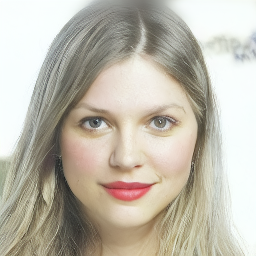

In [ ]:
display(image_pil)

<ipython-input-51-c470c65a232e>:6: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),
100%|██████████| 1000/1000 [01:01<00:00, 16.15it/s]


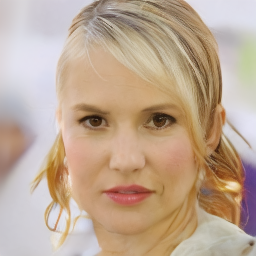

In [ ]:
seed = 6

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# decode image with vae
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

with torch.no_grad():
    image = vqvae.decode(image)

# process image
image_processed = image['sample'].cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
image_pil = PIL.Image.fromarray(image_processed[0])
display(image_pil)

<ipython-input-52-df1fb032263a>:6: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),
100%|██████████| 1000/1000 [01:05<00:00, 15.35it/s]


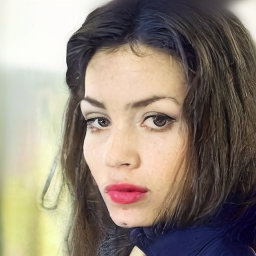

In [ ]:
seed = 2445

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# decode image with vae
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

with torch.no_grad():
    image = vqvae.decode(image)

# process image
image_processed = image['sample'].cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
image_pil = PIL.Image.fromarray(image_processed[0])
display(image_pil)

<ipython-input-53-f95607b381c6>:6: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),
100%|██████████| 1000/1000 [01:05<00:00, 15.29it/s]


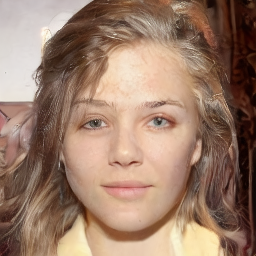

In [ ]:
seed = 1

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# decode image with vae
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

with torch.no_grad():
    image = vqvae.decode(image)

# process image
image_processed = image['sample'].cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
image_pil = PIL.Image.fromarray(image_processed[0])
display(image_pil)

<ipython-input-54-93bfeed0bb31>:6: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),
100%|██████████| 1000/1000 [01:05<00:00, 15.32it/s]


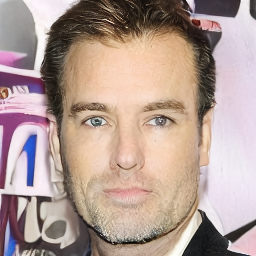

In [ ]:
seed = 0

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# decode image with vae
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

with torch.no_grad():
    image = vqvae.decode(image)

# process image
image_processed = image['sample'].cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
image_pil = PIL.Image.fromarray(image_processed[0])
display(image_pil)

<ipython-input-55-c9d878f0a059>:6: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),
100%|██████████| 1000/1000 [01:06<00:00, 15.12it/s]


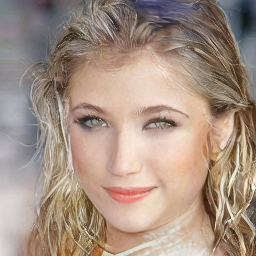

In [ ]:
seed = 10

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# decode image with vae
image = noise
for t in tqdm.tqdm(scheduler.timesteps):
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image

with torch.no_grad():
    image = vqvae.decode(image)

# process image
image_processed = image['sample'].cpu().permute(0, 2, 3, 1)
image_processed = (image_processed + 1.0) * 127.5
image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
image_pil = PIL.Image.fromarray(image_processed[0])
display(image_pil)

In [ ]:
seed = 10

# generate gaussian noise to be decoded
generator = torch.manual_seed(seed)
noise = torch.randn(
    (1, unet.in_channels, unet.sample_size, unet.sample_size),
    generator=generator,
).to(torch_device)

# decode image with vae
image = noise

<ipython-input-59-94cda4f694be>:6: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, unet.in_channels, unet.sample_size, unet.sample_size),


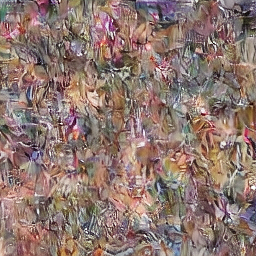

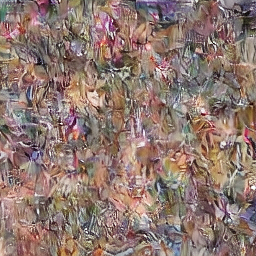

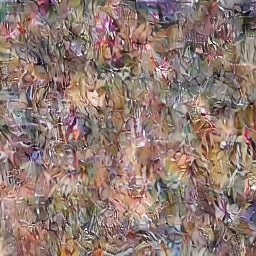

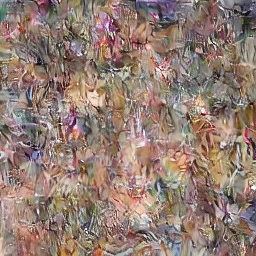

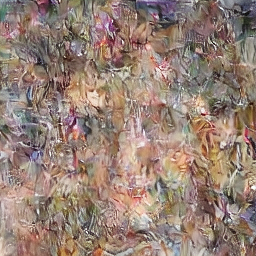

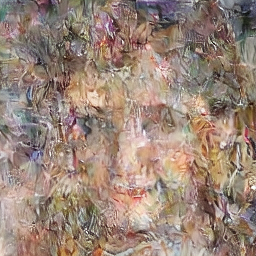

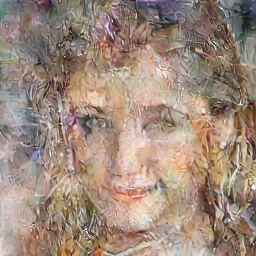

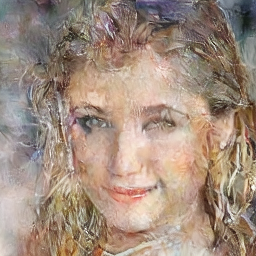

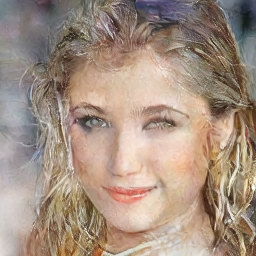

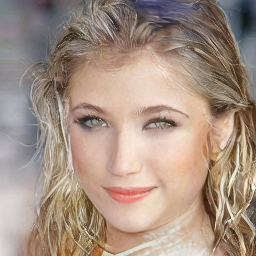

In [ ]:
# @title Default title text
for t in scheduler.timesteps:
    # predict noise residual of previous image
    with torch.no_grad():
        residual = unet(image, t)["sample"]

    # compute previous image x_t according to DDIM formula
    prev_image = scheduler.step(residual, t, image, eta=0.0)["prev_sample"]

    # x_t-1 -> x_t
    image = prev_image
    if t %100 == 0:
      with torch.no_grad():
        image_ = vqvae.decode(image)

      # process image
      image_processed = image_['sample'].cpu().permute(0, 2, 3, 1)
      image_processed = (image_processed + 1.0) * 127.5
      image_processed = image_processed.clamp(0, 255).numpy().astype(np.uint8)
      image_pil = PIL.Image.fromarray(image_processed[0])
      display(image_pil)